## Bayesian Bandit

In [178]:
from __future__ import division
import numpy as np
import pandas as pd
from scipy import stats 
from math import sqrt
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import itertools
import numpy.ma as ma

% matplotlib inline


In [57]:
site_a = np.loadtxt('data/siteA.txt')
site_b = np.loadtxt('data/siteB.txt')

In [58]:
site_a[:4]

array([ 0.,  0.,  0.,  0.])

In [59]:
site_b[:4]

array([ 0.,  0.,  0.,  0.])

In [60]:
sitea = site_a[:50]
N = len(sitea)
n = sum(sitea)

### beta plot

alpha = 1 + n 

beta = 1 + N -n

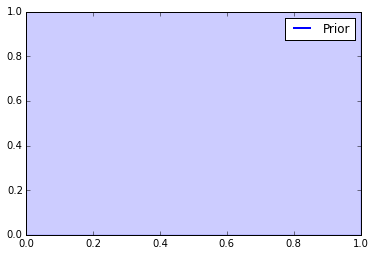

In [61]:
def plot_with_fill_ini(x, y, label):
    lines = plt.plot(x, y, label=label, lw=2)
    plt.fill_between(x, 0, y, alpha=0.2, color=lines[0].get_c())
    plt.legend()
    
plot_with_fill_ini(x, y_, label='Prior')

In [62]:
a, b = 1 + n, 1 + N -n

In [63]:
y_beta =  stats.beta.pdf(x, a, b)

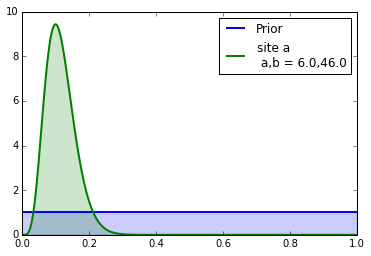

In [64]:
plot_with_fill_ini(x, y_, label='Prior')
plot_with_fill_ini(x,y_beta, label='site a \n a,b = {},{}'.format(a,b))

In [65]:
x = np.arange(0, 1.001, 0.001)
y = stats.beta.pdf(x, a=1, b=1)
y_ = stats.uniform.pdf(x) #this is the same as y with a=1 and b=1

In [66]:
def plot_with_fill(x, views, clicks, label):
    y = stats.beta.pdf(x, a=1.+clicks, b=1.+(views-clicks))
    lines = plt.plot(x, y, label=label, lw=2)
    plt.fill_between(x, 0, y, alpha=.2, color=lines[0].get_c())
    

(0.0, 0.3)

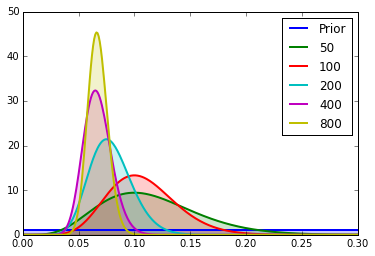

In [67]:
plt.colors
plot_with_fill(x, views=0, clicks=0, label='Prior')

for n in (50, 100, 200, 400, 800):
    plot_with_fill(x, views=len(site_a[:n]), clicks=sum(site_a[:n]), label=str(n) )
plt.legend()
plt.xlim(right=.3)


(0.0, 0.2)

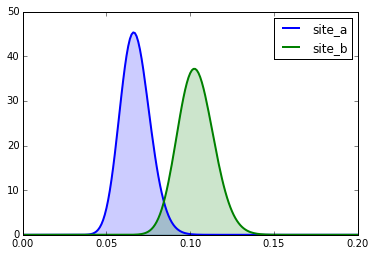

In [68]:
for data_, label_ in zip((site_a, site_b), ('site_a', 'site_b')):
    plot_with_fill(x, views=len(data_), clicks=sum(data_), label=label_ )
plt.legend()
plt.xlim(right=.2)

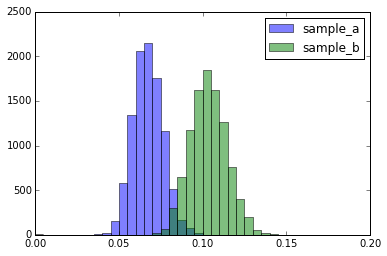

In [123]:
sample_size= 10000
#creating the distribution
distribution_a = stats.beta(a=1+sum(site_a), b=1+(len(site_a)-sum(site_a)))
distribution_b = stats.beta(a=1+sum(site_b), b=1+(len(site_b)-sum(site_b)))
#sample from the distributions
sample_a = distribution_a.rvs(size=sample_size)
sample_b = distribution_b.rvs(size=sample_size)

#graphing our samples
plt.hist(sample_a, alpha=0.5, bins=np.arange(0, 0.2, 0.005), label='sample_a');
plt.hist(sample_b, alpha=0.5, bins=np.arange(0, 0.2, 0.005), label='sample_b');
plt.legend();

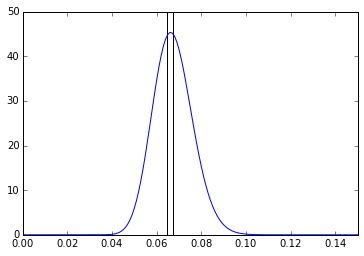

In [95]:
plt.plot(x, distribution_a.pdf(x));
plt.xlim(right=.15)
plt.vlines(distribution_a.expect(), *plt.ylim())
plt.vlines(distribution_a.ppf(.4), *plt.ylim())

In [103]:
sample_b > sample_a

array([ True,  True,  True, ...,  True,  True,  True], dtype=bool)

In [96]:
print 'The probability that site B is better than site A is: {:.4f}'.format(sum(sample_b > sample_a)/sample_size)

The probability that site B is better than site A is: 0.9954


### Highest Density Interval (HDI)

HDI is analogous to frequentist analysis's confidence intervals. 

-Determine the 95% HDI for site site A beta distribution

In [97]:
HDI_int = .95

In [98]:
HDI_a = (distribution_a.ppf((1-HDI_int)/2), distribution_a.ppf((HDI_int + (1-HDI_int)/2)))

In [99]:
HDI_b = (distribution_b.ppf((1-HDI_int)/2), distribution_b.ppf((HDI_int + (1-HDI_int)/2)))

In [100]:
print 'HDI on A: [{:.4f} to {:.4f}]'.format(*HDI_a)
print 'HDI on B: [{:.4f} to {:.4f}]'.format(*HDI_b)

HDI on A: [0.0510 to 0.0857]
HDI on B: [0.0834 to 0.1255]


In [105]:
sample_b > (sample_a + .02)

array([ True, False,  True, ...,  True,  True,  True], dtype=bool)

In [102]:
print "The probability that B is better than A+.02 is: {:.4f}".format(sum(sample_b > (sample_a + .02)) / sample_size)

The probability that B is better than A+.02 is: 0.8776


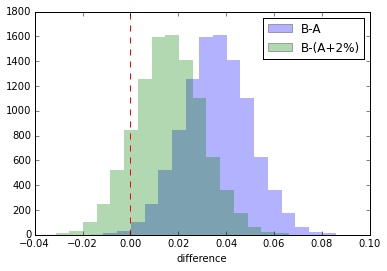

In [122]:
plt.hist((sample_b-sample_a), bins=20, alpha=0.3, edgecolor='none', label='B-A');
plt.hist((sample_b-(sample_a+0.02)), bins=20, alpha=0.3, edgecolor='none', label='B-(A+2%)');
plt.vlines(0, *plt.ylim(), color='r', linestyle='dashed');
plt.xlabel('difference');
plt.legend();

#### Frequentist Aproach
*Just for fun

In [142]:
ctrl_a = sum(site_a)/ len(site_a)
ctrl_b = sum(site_b)/ len(site_b)


In [149]:
ctrl_t = sum(site_a+site_b)/ (len(site_a) + len(site_b))
ctrl_t

0.084375000000000006

ssq = sum of squares

In [159]:
ssq = ctrl_t * (1-ctrl_t) * (1 / len(site_a) + 1/ len(site_b))
ssq

0.00019313964843750003

In [160]:
z = (ctrl_b - ctrl_a)/ sqrt(ssq)

In [161]:
z

2.6083885951055539

In [162]:
print "P-value: {:.5f}".format(1-stats.norm.cdf(z))

P-value: 0.00455





It's important to understand the business impact of your work as a data scientist. Imagine that your company is debating whether to switch to site B from site A. Assume the following:

the average click on site A yields 1.00 in profit

the average click on site B yields 1.05 in profit

Should your company invest in switching to site B? Assume it is costly to do so, both in time and money. Explain. (Hint: The answer is not obvious.)


In [171]:
n_clicks = np.arange(0, 1e6, 1000)
cost = np.arange(0, 20000, 500)

In [172]:
def gain(clicks, cost):
    return (1.05*clicks) - (1.* clicks) - cost

In [177]:
click_matrix, cost_matrix = np.meshgrid(n_clicks, cost)
gain_matrix = gain(click_matrix, cost_matrix)
gain_matrix

array([[     0.,     50.,    100., ...,  49850.,  49900.,  49950.],
       [  -500.,   -450.,   -400., ...,  49350.,  49400.,  49450.],
       [ -1000.,   -950.,   -900., ...,  48850.,  48900.,  48950.],
       ..., 
       [-18500., -18450., -18400., ...,  31350.,  31400.,  31450.],
       [-19000., -18950., -18900., ...,  30850.,  30900.,  30950.],
       [-19500., -19450., -19400., ...,  30350.,  30400.,  30450.]])

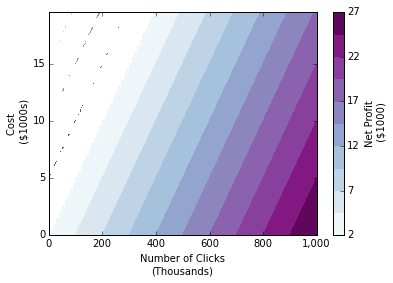

In [203]:
step = 5000
fig, ax = plt.subplots()
a = ax.contourf(n_clicks, cost, np.ma.masked_less_equal(gain_matrix, 0), 
                 np.arange(0, gain_matrix.max()+step, step), cmap=cm.BuPu)

b = ax.contourf(n_clicks, cost, np.ma.masked_greater(gain_matrix, 0),
                np.arange(0, gain_matrix.min()-2*step, -step), cmap=cm.Greys)

clr_bar = fig.colorbar(a)
clr_bar.set_label('Net Profit \n ($1000)')
clr_bar.set_ticklabels(['{}'.format(int(i/1000)) for i in clr_bar.values])
ax.set_xlabel('Number of Clicks\n(Thousands)');
ax.set_ylabel('Cost \n ($1000s)');
ax.set_yticklabels(['{:,}'.format(int(i/1000)) for i in ax.get_yticks()]);
ax.set_xticklabels(['{:,}'.format(int(i/1000)) for i in ax.get_xticks()]);